<a href="https://colab.research.google.com/github/soulayman-git/test-sub-branch/blob/master/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regression Lineare**

**Methode normal**


Valeurs estimées par la méthode normale : a = 2.0137932673366548, b = 2.8271871459226277
Valeurs réelles : a = 2, b = 3


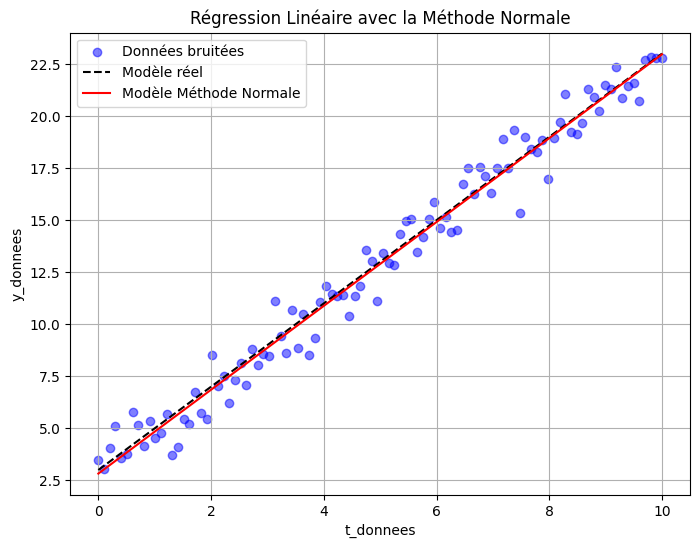

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données synthétiques (t_donnees et y)
np.random.seed(42)
t_donnees = np.linspace(0, 10, 100)  # Vecteur des valeurs de t_donnees
a_vrai, b_vrai = 2, 3  # paramètres réels
y_donnees = a_vrai * t_donnees + b_vrai + np.random.normal(0, 1, len(t_donnees))  # y_donnees = ax + b avec du bruit

# Appliquer la méthode normale
X = np.vstack((t_donnees, np.ones_like(t_donnees))).T  # Ajouter une colonne de 1 pour l'ordonnée à l'origine
theta = np.linalg.inv(X.T @ X) @ X.T @ y_donnees  # Résoudre pour les paramètres (a, b)

a_normale, b_normale = theta  # Extraire les coefficients

# Afficher les résultats
print(f"Valeurs estimées par la méthode normale : a = {a_normale}, b = {b_normale}")
print(f"Valeurs réelles : a = {a_vrai}, b = {b_vrai}")

# Tracer les résultats
plt.figure(figsize=(8, 6))
plt.scatter(t_donnees, y_donnees, label="Données bruitées", color='blue', alpha=0.5)  # Utilisation correcte de t_donnees
plt.plot(t_donnees, a_vrai * t_donnees + b_vrai, label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, a_normale * t_donnees + b_normale, label="Modèle Méthode Normale", color='red')
plt.title("Régression Linéaire avec la Méthode Normale")
plt.xlabel("t_donnees")
plt.ylabel("y_donnees")
plt.legend()
plt.grid(True)
plt.show()


Methode garadiant descente pas fix, pas optimal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données synthétiques pour la régression linéaire
np.random.seed(42)
t_donnees = np.linspace(0, 10, 100)
a_vrai, b_vrai = 2, 1
y_donnees = a_vrai * t_donnees + b_vrai + np.random.normal(0, 1, len(t_donnees))

# Fonction de perte (Erreur quadratique moyenne)
def fonction_perte(t, y, a, b):
    predictions = a * t + b
    return np.mean((predictions - y) ** 2)

# Gradient de la fonction de perte
def gradients(t, y, a, b):
    grad_a = -2 * np.mean((y - (a * t + b)) * t)
    grad_b = -2 * np.mean(y - (a * t + b))
    return grad_a, grad_b

# 1. Descente de gradient avec pas fixe
def descente_gradient_pas_fixe(t, y, a_init, b_init, taux_apprentissage, n_iterations):
    a, b = a_init, b_init
    historique_perte = []
    for i in range(n_iterations):
        grad_a, grad_b = gradients(t, y, a, b)
        a -= taux_apprentissage * grad_a
        b -= taux_apprentissage * grad_b
        historique_perte.append(fonction_perte(t, y, a, b))
    return a, b, historique_perte

# 2. Recherche de pas optimal
def recherche_pas_optimal(t, y, a, b, grad_a, grad_b, taux_apprentissage=1.0):
    alpha = 0.5  # facteur de réduction
    beta = 0.1   # tolérance
    while fonction_perte(t, y, a - taux_apprentissage * grad_a, b - taux_apprentissage * grad_b) > fonction_perte(t, y, a, b) - beta * taux_apprentissage * (grad_a**2 + grad_b**2):
        taux_apprentissage *= alpha
    return taux_apprentissage

def descente_gradient_recherche_pas_optimal(t, y, a_init, b_init, n_iterations):
    a, b = a_init, b_init
    historique_perte = []
    for i in range(n_iterations):
        grad_a, grad_b = gradients(t, y, a, b)
        taux_apprentissage = recherche_pas_optimal(t, y, a, b, grad_a, grad_b)
        a -= taux_apprentissage * grad_a
        b -= taux_apprentissage * grad_b
        historique_perte.append(fonction_perte(t, y, a, b))
    return a, b, historique_perte

# 3. Gradient conjugué
def gradient_conjugue(t, y, a_init, b_init, n_iterations):
    a, b = a_init, b_init
    grad_a, grad_b = gradients(t, y, a, b)
    r = np.array([grad_a, grad_b])  # Résidu initial
    p = r.copy()  # Direction de recherche initiale
    historique_perte = []

    for i in range(n_iterations):
        alpha = np.dot(r, r) / np.dot(p, gradients(t, y, a, b))  # Calcul de alpha
        a -= alpha * grad_a
        b -= alpha * grad_b

        grad_a, grad_b = gradients(t, y, a, b)
        r_new = np.array([grad_a, grad_b])

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p  # Mise à jour de la direction de recherche
        r = r_new

        historique_perte.append(fonction_perte(t, y, a, b))

# Appliquer les différentes méthodes
a_init, b_init = 1, 1
n_iterations = 1000

Valeurs estimées : Descente de Gradient avec Pas Fixe -> a = 2.013463324664728, b = 0.8293814946224731


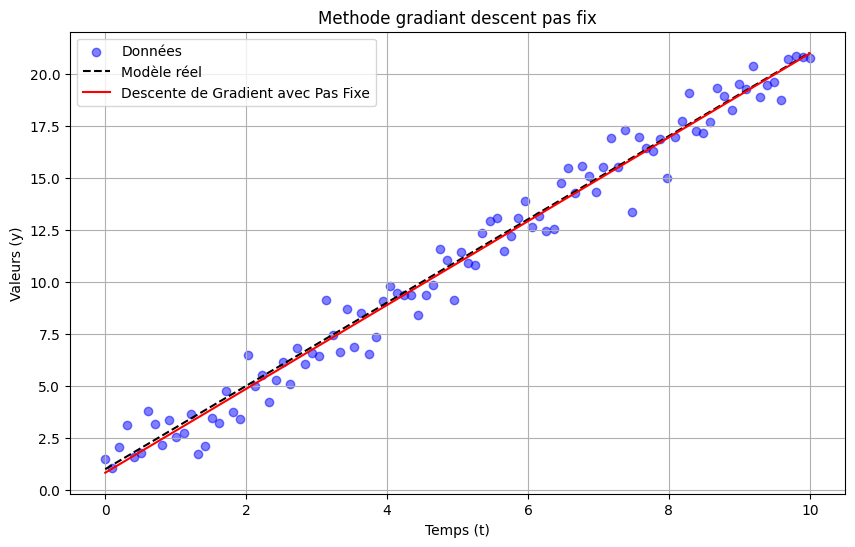

In [3]:
# Descente de gradient avec pas fixe
a_gd_fs, b_gd_fs, perte_gd_fs = descente_gradient_pas_fixe(t_donnees, y_donnees, a_init, b_init, taux_apprentissage=0.01, n_iterations=n_iterations)

plt.figure(figsize=(10, 6))
plt.scatter(t_donnees, y_donnees, label="Données", color='blue', alpha=0.5)
plt.plot(t_donnees, a_vrai * t_donnees + b_vrai, label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, a_gd_fs * t_donnees + b_gd_fs, label="Descente de Gradient avec Pas Fixe", color='red')

print(f"Valeurs estimées : Descente de Gradient avec Pas Fixe -> a = {a_gd_fs}, b = {b_gd_fs}")
plt.title("Methode gradiant descent pas fix")
plt.legend()
plt.xlabel("Temps (t)")
plt.ylabel("Valeurs (y)")
plt.grid()
plt.show()

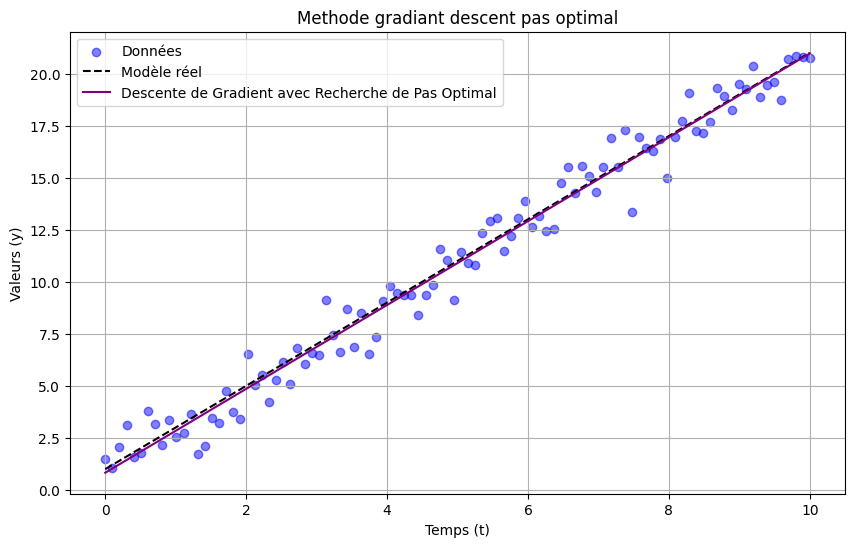

Valeurs estimées : Descente de Gradient avec Recherche de Pas Optimal -> a = 2.013793253714346, b = 0.8271872348772513


In [4]:
# Descente de gradient avec recherche de pas optimal
a_gd_rpo, b_gd_rpo, perte_gd_rpo = descente_gradient_recherche_pas_optimal(t_donnees, y_donnees, a_init, b_init, n_iterations)

plt.figure(figsize=(10, 6))
plt.scatter(t_donnees, y_donnees, label="Données", color='blue', alpha=0.5)
plt.plot(t_donnees, a_vrai * t_donnees + b_vrai, label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, a_gd_rpo * t_donnees + b_gd_rpo, label="Descente de Gradient avec Recherche de Pas Optimal", color='purple')

plt.title("Methode gradiant descent pas optimal")
plt.legend()
plt.xlabel("Temps (t)")
plt.ylabel("Valeurs (y)")
plt.grid()
plt.show()

print(f"Valeurs estimées : Descente de Gradient avec Recherche de Pas Optimal -> a = {a_gd_rpo}, b = {b_gd_rpo}")

### **Regression non linear**

Methode Normal

Paramètres optimisés : a = 1.91919705358773, b = 0.467102480701612, c = -0.9982891860001728, d = 0.033225410982836774


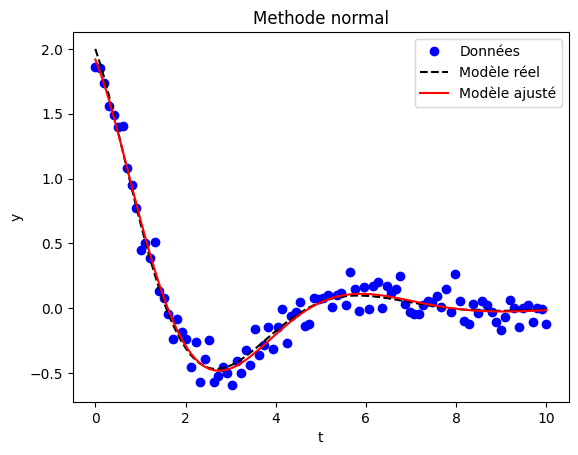

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Fonction modèle
def model(t, a, b, c, d):
    return a * np.exp(-b * t) * np.cos(c * t + d)

# Données simulées (par exemple)
t_data = np.linspace(0, 10, 100)  # valeurs de t de 0 à 10
y_data = model(t_data, 2, 0.5, 1, 0) + 0.1 * np.random.normal(size=len(t_data))  # y avec un peu de bruit

# Estimation des paramètres avec des valeurs initiales
initial_guess = [1, 1, 1, 1]
params, covariance = curve_fit(model, t_data, y_data, p0=initial_guess) # minimiser la différence entre les prédictions du modèle et les données réelles

# Afficher les paramètres optimisés
a_opt, b_opt, c_opt, d_opt = params
print(f"Paramètres optimisés : a = {a_opt}, b = {b_opt}, c = {c_opt}, d = {d_opt}")

# Tracer les données, la courbe ajustée, et le modèle réel
y_fit = model(t_data, a_opt, b_opt, c_opt, d_opt)
y_real = model(t_data, 2, 0.5, 1, 0)  # Modèle réel sans bruit
plt.title("Methode normal")
plt.plot(t_data, y_data, 'o', label='Données', color='blue')
plt.plot(t_data, y_real, '--', label='Modèle réel', color='black')
plt.plot(t_data, y_fit, '-', label='Modèle ajusté', color='red')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


Pas fix

Valeurs estimées : a = 2.0598423801876447, b = 0.600643317875673, c = 2.5917495302924456, d = -0.6208921680091524
Valeurs reels : a = 5, b = 1, c = 2, d = 0.5


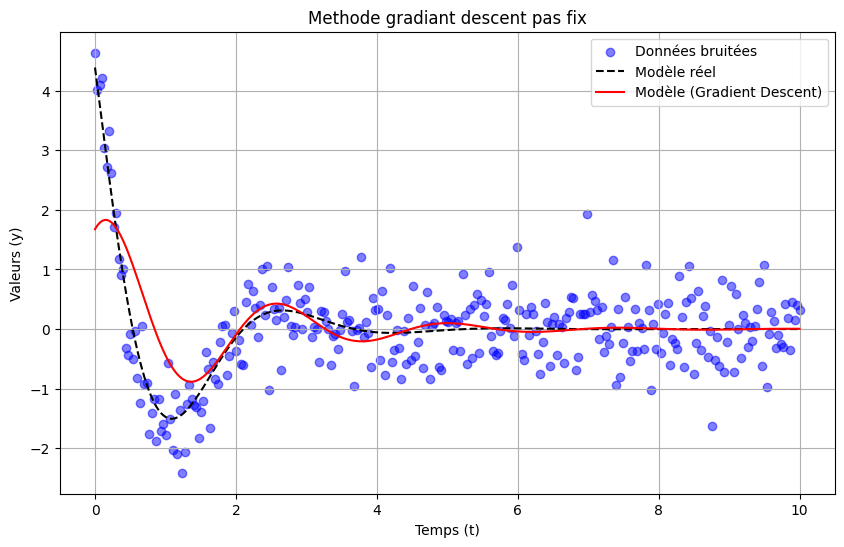

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le modèle
def modele(t, a, b, c, d):
    return a * np.exp(-b * t) * np.cos(c * t + d)

# Fonction de perte (Erreur quadratique moyenne)
def fonction_perte(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    return np.mean((predictions - y) ** 2)

# Gradient de la fonction de perte
def gradients(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    grad_a = 2 * np.mean((predictions - y) * np.exp(-b * t) * np.cos(c * t + d))
    grad_b = 2 * np.mean((predictions - y) * (-a * t * np.exp(-b * t) * np.cos(c * t + d)))
    grad_c = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * t * np.sin(c * t + d)))
    grad_d = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * np.cos(c * t + d)))
    return grad_a, grad_b, grad_c, grad_d

# Descente de gradient avec pas fixe
def descente_gradient_pas_fixe(t, y, a_init, b_init, c_init, d_init, taux_apprentissage, n_iterations):
    a, b, c, d = a_init, b_init, c_init, d_init
    historique_perte = []
    for i in range(n_iterations):
        grad_a, grad_b, grad_c, grad_d = gradients(t, y, a, b, c, d)
        a -= taux_apprentissage * grad_a
        b -= taux_apprentissage * grad_b
        c -= taux_apprentissage * grad_c
        d -= taux_apprentissage * grad_d
        historique_perte.append(fonction_perte(t, y, a, b, c, d))
    return a, b, c, d, historique_perte

# Générer des données synthétiques
np.random.seed(42)
t_donnees = np.linspace(0, 10, 300)
a_vrai, b_vrai, c_vrai, d_vrai = 5, 1, 2, 0.5
y_donnees = modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai) + np.random.normal(0, 0.5, len(t_donnees))

# Appliquer la descente de gradient avec pas fixe
a_gd, b_gd, c_gd, d_gd, perte_gd = descente_gradient_pas_fixe(
    t_donnees, y_donnees, a_init=1, b_init=1, c_init=1, d_init=1, taux_apprentissage=0.01, n_iterations=1000
)

# Tracer les résultats
print(f"Valeurs estimées : a = {a_gd}, b = {b_gd}, c = {c_gd}, d = {d_gd}")
print(f"Valeurs reels : a = {a_vrai}, b = {b_vrai}, c = {c_vrai}, d = {d_vrai}")
plt.figure(figsize=(10, 6))
plt.scatter(t_donnees, y_donnees, label="Données bruitées", color='blue', alpha=0.5)
plt.plot(t_donnees, modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai), label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, modele(t_donnees, a_gd, b_gd, c_gd, d_gd), label="Modèle (Gradient Descent)", color='red')
plt.title("Methode gradiant descent pas fix")
plt.xlabel("Temps (t)")
plt.ylabel("Valeurs (y)")
plt.legend()
plt.grid()
plt.show()


Il y a plusieurs raisons pour lesquelles le modèle estimé par la descente de gradient (en rouge) ne correspond pas exactement au modèle réel (en noir). Voici les principales explications :

1. Bruit dans les Données
Les données utilisées pour entraîner le modèle contiennent du bruit (ajouté aléatoirement avec np.random.normal). Cela peut rendre l'ajustement des paramètres plus difficile.
Le bruit peut empêcher la descente de gradient de converger parfaitement vers les valeurs réelles des paramètres.
2. Initialisation des Paramètres
La descente de gradient démarre à partir d'une estimation initiale des paramètres (a=1, b=1, c=1, d=1). Si ces valeurs sont loin des paramètres réels (
a=5, b=1, c=2, d=0.5), la convergence peut être lente ou partielle.
Une mauvaise initialisation peut piéger l'algorithme dans un minimum local.
3. Taux d'Apprentissage
Le taux d'apprentissage (𝜂=0.01) utilisé dans cet exemple est fixe. Si ce taux est trop petit, la convergence est lente et peut ne pas atteindre le minimum global dans le nombre d'itérations spécifié.
Si le taux est trop grand, il peut provoquer des oscillations autour du minimum ou empêcher la convergence.
4. Nombre d'Itérations
Le nombre d'itérations (1000) peut être insuffisant pour que l'algorithme converge complètement, surtout si le gradient diminue lentement au fur et à mesure de l'ajustement des paramètres.
5. Non-linéarité et Complexité de la Fonction
La fonction f(t)=aexp(−bt)cos(ct+d) est hautement non-linéaire par rapport à ses paramètres. Cela rend la descente de gradient plus difficile, car l'algorithme peut avoir du mal à trouver la direction optimale dans cet espace non-linéaire.
6. Pas d'Approches Avancées
Les méthodes comme momentum, Adam, ou encore la descente avec pas optimal pourraient améliorer la performance de la descente de gradient et permettre une meilleure convergence vers les paramètres réels.


## **Pas Optimal**

Valeurs estimées : a = 2.0598423801876447, b = 0.600643317875673, c = 2.5917495302924456, d = -0.6208921680091524
Valeurs reels : a = 5, b = 1, c = 2, d = 0.5


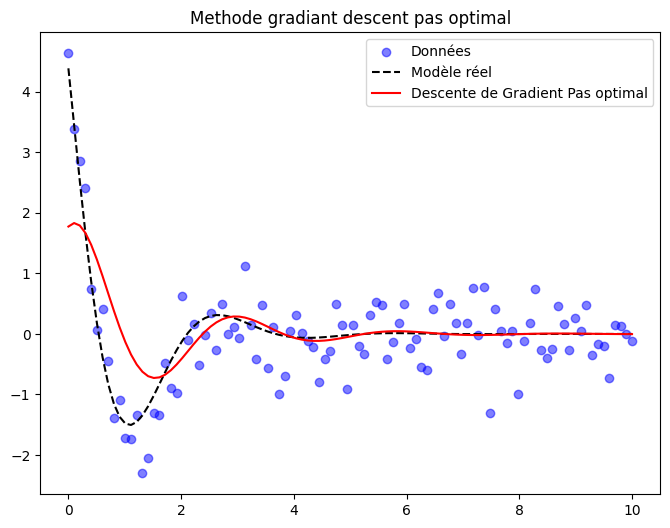

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le modèle
def modele(t, a, b, c, d):
    return a * np.exp(-b * t) * np.cos(c * t + d)

# Fonction de perte (Erreur quadratique moyenne)
def fonction_perte(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    return np.mean((predictions - y) ** 2)

# Gradient de la fonction de perte
def gradients(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    grad_a = 2 * np.mean((predictions - y) * np.exp(-b * t) * np.cos(c * t + d))
    grad_b = 2 * np.mean((predictions - y) * (-a * t * np.exp(-b * t) * np.cos(c * t + d)))
    grad_c = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * t * np.sin(c * t + d)))
    grad_d = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * np.cos(c * t + d)))
    return grad_a, grad_b, grad_c, grad_d

# Recherche pas optimal pour ajuster le taux d'apprentissage
def recherche_pas_optimal(t, y, a, b, c, d, grad_a, grad_b, grad_c, grad_d, taux_apprentissage=1.0):
    alpha = 0.5  # facteur de réduction
    beta = 0.1   # tolérance
    while fonction_perte(t, y, a - taux_apprentissage * grad_a, b - taux_apprentissage * grad_b, c - taux_apprentissage * grad_c, d - taux_apprentissage * grad_d) > fonction_perte(t, y, a, b, c, d) - beta * taux_apprentissage * (grad_a**2 + grad_b**2 + grad_c**2 + grad_d**2):
        taux_apprentissage *= alpha
    return taux_apprentissage

def descente_gradient_recherche_pas_optimal(t, y, a_init, b_init, c_init, d_init, n_iterations):
    a, b, c, d = a_init, b_init, c_init, d_init
    historique_perte = []
    for i in range(n_iterations):
        grad_a, grad_b, grad_c, grad_d = gradients(t, y, a, b, c, d)
        taux_apprentissage = recherche_pas_optimal(t, y, a, b, c, d, grad_a, grad_b, grad_c, grad_d)
        a -= taux_apprentissage * grad_a
        b -= taux_apprentissage * grad_b
        c -= taux_apprentissage * grad_c
        d -= taux_apprentissage * grad_d
        historique_perte.append(fonction_perte(t, y, a, b, c, d))
    return a, b, c, d, historique_perte

# Générer des données synthétiques basées sur le modèle
np.random.seed(42)
t_donnees = np.linspace(0, 10, 100)
a_vrai, b_vrai, c_vrai, d_vrai = 5, 1, 2, 0.5
y_donnees = modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai) + np.random.normal(0, 0.5, len(t_donnees))  # Ajouter du bruit

# Appliquer la descente de gradient avec recherche de ligne
a_gd_ls, b_gd_ls, c_gd_ls, d_gd_ls, perte_gd_ls = descente_gradient_recherche_pas_optimal(t_donnees, y_donnees, a_init=1, b_init=1, c_init=1, d_init=1, n_iterations=1000)

# Afficher les résultats
print(f"Valeurs estimées : a = {a_gd}, b = {b_gd}, c = {c_gd}, d = {d_gd}")
print(f"Valeurs reels : a = {a_vrai}, b = {b_vrai}, c = {c_vrai}, d = {d_vrai}")

plt.figure(figsize=(8, 6))
plt.scatter(t_donnees, y_donnees, label="Données", color='blue', alpha=0.5)
plt.plot(t_donnees, modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai), label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, modele(t_donnees, a_gd_ls, b_gd_ls, c_gd_ls, d_gd_ls), label="Descente de Gradient Pas optimal", color='red')
plt.title("Methode gradiant descent pas optimal")
plt.legend()
plt.show()


Conjugee

Valeurs estimées : a = 2.0598423801876447, b = 0.600643317875673, c = 2.5917495302924456, d = -0.6208921680091524


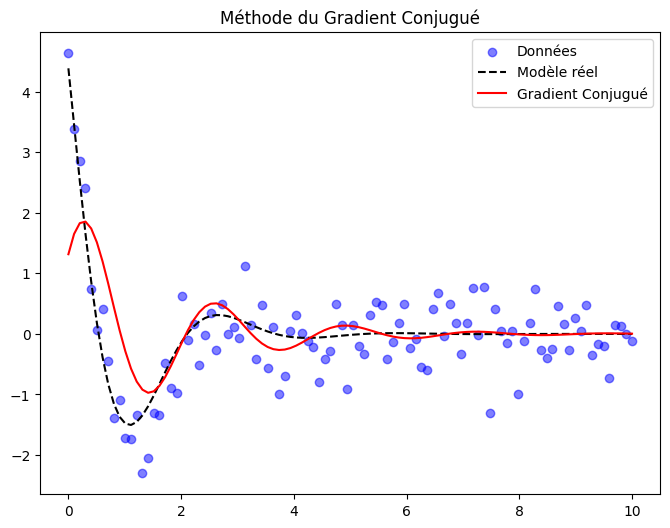

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le modèle
def modele(t, a, b, c, d):
    return a * np.exp(-b * t) * np.cos(c * t + d)

# Fonction de perte (Erreur quadratique moyenne)
def fonction_perte(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    return np.mean((predictions - y) ** 2)

# Gradient de la fonction de perte
def gradients(t, y, a, b, c, d):
    predictions = modele(t, a, b, c, d)
    grad_a = 2 * np.mean((predictions - y) * np.exp(-b * t) * np.cos(c * t + d))
    grad_b = 2 * np.mean((predictions - y) * (-a * t * np.exp(-b * t) * np.cos(c * t + d)))
    grad_c = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * t * np.sin(c * t + d)))
    grad_d = 2 * np.mean((predictions - y) * (-a * np.exp(-b * t) * np.cos(c * t + d)))
    return grad_a, grad_b, grad_c, grad_d

# Méthode du Gradient Conjugué
def gradient_conjugue(t, y, a_init, b_init, c_init, d_init, n_iterations):
    # Initialisation des paramètres
    a, b, c, d = a_init, b_init, c_init, d_init
    grad_a, grad_b, grad_c, grad_d = gradients(t, y, a, b, c, d)
    r = np.array([grad_a, grad_b, grad_c, grad_d])  # Résidu initial (gradient)
    p = r.copy()  # Direction de recherche initiale
    historique_perte = []

    for i in range(n_iterations):
        # Calcul de alpha (taille du pas)
        alpha = np.dot(r, r) / np.dot(p, gradients(t, y, a, b, c, d))

        # Mise à jour des paramètres
        a -= alpha * grad_a
        b -= alpha * grad_b
        c -= alpha * grad_c
        d -= alpha * grad_d

        # Nouveau résidu
        grad_a, grad_b, grad_c, grad_d = gradients(t, y, a, b, c, d)
        r_new = np.array([grad_a, grad_b, grad_c, grad_d])

        # Calcul du facteur beta pour la mise à jour de la direction
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p  # Mise à jour de la direction de recherche
        r = r_new
        historique_perte.append(fonction_perte(t, y, a, b, c, d))
    return a, b, c, d, historique_perte

# Générer des données synthétiques basées sur le modèle
np.random.seed(42)
t_donnees = np.linspace(0, 10, 100)
a_vrai, b_vrai, c_vrai, d_vrai = 5, 1, 2, 0.5
y_donnees = modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai) + np.random.normal(0, 0.5, len(t_donnees))  # Ajouter du bruit

# Appliquer la méthode du gradient conjugué
a_cg, b_cg, c_cg, d_cg, perte_cg = gradient_conjugue(t_donnees, y_donnees, a_init=1, b_init=1, c_init=1, d_init=1, n_iterations=10000)

# Afficher les résultats
print(f"Valeurs estimées : a = {a_gd}, b = {b_gd}, c = {c_gd}, d = {d_gd}")
plt.figure(figsize=(8, 6))
plt.scatter(t_donnees, y_donnees, label="Données", color='blue', alpha=0.5)
plt.plot(t_donnees, modele(t_donnees, a_vrai, b_vrai, c_vrai, d_vrai), label="Modèle réel", color='black', linestyle='--')
plt.plot(t_donnees, modele(t_donnees, a_cg, b_cg, c_cg, d_cg), label="Gradient Conjugué", color='red')
plt.title("Méthode du Gradient Conjugué")
plt.legend()
plt.show()
